In [1]:
# conda install -c conda-forge keras tensorflow

In [102]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [103]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend
from keras.metrics import RootMeanSquaredError
import tensorflow as tf
import random
import os
from ipywidgets import widgets, interact

<ul>
    <li> <b>mom </b> = Momentum </li>
    <li><b>ROC </b>= Rate of Change </li>
    <li><b>EMA </b>= Exponential Moving Average </li>
    <li> <b> Volume = </b>  the number of shares traded </li>
</ul>    

In [104]:
df11 = pd.read_csv("/content/drive/MyDrive/Assignment data/Processed_DJI.csv")

print(df11.head(20))
df12 = pd.read_csv("/content/drive/MyDrive/Assignment data/Processed_NASDAQ.csv")
df13 = pd.read_csv("/content/drive/MyDrive/Assignment data/Processed_NYSE.csv")
df14 = pd.read_csv("/content/drive/MyDrive/Assignment data/Processed_RUSSELL.csv")
df15 = pd.read_csv("/content/drive/MyDrive/Assignment data/Processed_S&P.csv")
print(df15.head(20))

          Date         Close      Volume  ...  wheat-F   XAG   XAU
0   2009-12-31  10428.049805         NaN  ...    -0.48  0.30  0.39
1   2010-01-04  10583.959961         NaN  ...     3.12  3.91  2.10
2   2010-01-05  10572.019531         NaN  ...    -0.90  1.42 -0.12
3   2010-01-06  10573.679688    0.515598  ...     2.62  2.25  1.77
4   2010-01-07  10606.860352    9.776045  ...    -1.85  0.22 -0.58
5   2010-01-08  10618.190430   -0.838081  ...     2.07  1.26  0.38
6   2010-01-11  10663.990234   -0.430942  ...     1.08  0.65  1.44
7   2010-01-12  10627.259766   -6.158991  ...    -6.33 -1.78 -2.19
8   2010-01-13  10680.769531   -1.231957  ...    -0.51  1.97  0.98
9   2010-01-14  10710.549805   -0.361795  ...    -1.49  0.32  0.39
10  2010-01-15  10609.650391  113.304592  ...    -3.27 -1.45 -1.08
11  2010-01-19  10725.429688   -0.985615  ...    -2.08  0.70  0.45
12  2010-01-20  10603.150391   -0.292021  ...    -2.08 -4.69 -2.32
13  2010-01-21  10389.879883   -7.756601  ...     2.35 -2.80 -

In [105]:
print(df11.columns)
print(df12.columns)

Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA',
       'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM',
       'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'GSPC', 'HSI', 'IXIC',
       'SSEC', 'RUT', 'NYSE', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2',
       'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent',
       'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F',
       'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD',
       'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F',
       'Dollar index', 'wheat-F', 'XAG', 'XAU'],
      dtype='object')
Index(['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5',
       'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200',
       'DTB4WK', 'DTB

All column attributes are the same except for one. Column number corresponds to index name - a string type feature. Hence, it needs to be removed.

In [106]:
for i in [df11, df12, df13, df14, df15]:
    i.drop(i.columns[58], axis=1, inplace=True)

In [107]:
# # Create text widget for output
# var1= widgets.Text()
# var2= widgets.Text()
# var3= widgets.Text()
# var4= widgets.Text()
# var5= widgets.Text()

# def my_function1(x):
#     var1.value = x

# def my_function2(x):
#     var2.value = x

# def my_function3(x):
#     var3.value = x

# def my_function4(x):
#     var4.value = x

# # def my_function(x):
# #     var5.value = x

# activation = ['sigmoid', 'tanh', 'relu', 'selu', 'elu', 'exponential']
# optimiser = ['RMS', 'Adam']
# stock = ['DJI', 'NASDAQ', 'NYSE', 'RUSSELL', 'S&P']
# output = ['Close', 'Volume']
# z1 = interact(my_function1, x=activation)
# z2 = interact(my_function2, x=optimiser)
# z3 = interact(my_function3, x=stock)
# z4 = interact(my_function4, x=output)


interactive(children=(Dropdown(description='x', options=('sigmoid', 'tanh', 'relu', 'selu', 'elu', 'exponentia…

interactive(children=(Dropdown(description='x', options=('RMS', 'Adam'), value='RMS'), Output()), _dom_classes…

interactive(children=(Dropdown(description='x', options=('DJI', 'NASDAQ', 'NYSE', 'RUSSELL', 'S&P'), value='DJ…

interactive(children=(Dropdown(description='x', options=('Close', 'Volume'), value='Close'), Output()), _dom_c…

In [108]:
# print(var1.value)
# print(var2.value)
# print(var3.value)
# print(var4.value)
# type(var4.value)

sigmoid
RMS
DJI
Close


str

In [109]:
def shifter1(df):
    df_shifted = df.set_index(["Date"]).shift(1)
    return df_shifted

def shifter2(df):
    df_shifted = df.set_index(["Date"]).shift(2)
    return df_shifted

def shifter3(df):
    df_shifted = df.set_index(["Date"]).shift(3)
    return df_shifted
  
def Union(lst1, lst2):
    final_list = sorted(lst1 + lst2)
    return final_list

Choose which stock index to predict.



In [110]:
df1 = df11

In [111]:
#Replace missing values by 5-point rolling average
df1 = df1.fillna(df1.rolling(5,min_periods=1).mean())

nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1984 rows and 83 columns


In [112]:
print(df1[df1['Date'] == "2017-11-09"])

df1['EMA_200'][200-2: 220]

            Date         Close   Volume  ...  wheat-F   XAG   XAU
1979  2017-11-09  23461.939453  6.51174  ...     0.53 -0.26  0.32

[1 rows x 83 columns]


198             NaN
199    10501.546699
200    10507.936189
201    10512.619611
202    10518.543493
203    10524.792516
204    10530.839950
205    10537.140545
206    10543.432281
207    10549.231763
208    10554.850852
209    10560.459204
210    10566.072745
211    10572.268238
212    10578.664871
213    10587.184025
214    10595.710354
215    10603.781294
216    10611.174017
217    10618.595570
218    10625.207550
219    10630.853048
Name: EMA_200, dtype: float64

In [113]:
start_index = 202

X1 = shifter1(df1).iloc[start_index:].reset_index(drop = True)
X2 = shifter2(df1).iloc[start_index:].reset_index(drop = True)
X3 = shifter3(df1).iloc[start_index:].reset_index(drop = True)
y1 = df1.iloc[start_index:,1:2].reset_index(drop = True)
y2 = df1.iloc[start_index:,2].reset_index(drop = True)
X1.head()
X2.head()
X3.head()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,RUT,NYSE,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
0,11062.780273,3.599483,-0.002865,-0.000136,0.006867,0.000914,0.511515,2.152424,1.864785,4.288623,10995.004966,10881.693298,10668.420078,10501.546699,0.14,0.14,0.17,1.20,2.59,-0.017894,-0.004187,4.81,5.85,0.002388,-0.002518,-0.002832,-0.000781,0.041117,0.058574,-0.050117,-0.002667,-0.040547,0.012287,-0.046116,-0.001685,0.002147,-0.004156,0.005736,0.002027,-0.003964,...,-0.002171,-0.003444,2.45,2.45,2.42,0.00,0.03,1.04,3.26,5.68,5.71,5.71,0.000000,-0.026316,0.016949,-0.37,-2.46,0.26,0.66,-1.74,0.35,-0.25,-0.72,-0.61,-0.41,-0.45,0.10,1.60,-3.34,-0.52,0.01,-1.72,-0.58,0.13,0.35,0.51,0.51,-0.30,-1.30,-0.88
1,11143.690430,-0.721694,0.007314,-0.002865,-0.000136,0.006867,1.211140,3.649996,3.067417,3.627340,11022.038686,10906.645406,10687.058131,10507.936189,0.14,0.15,0.18,1.14,2.52,0.022529,-0.000183,4.74,5.78,0.002388,-0.002518,-0.002832,-0.000781,0.010358,-0.006560,-0.003067,0.004562,0.028264,0.010963,0.054707,0.016720,0.001863,0.006856,0.003748,0.007244,-0.012133,...,0.009912,0.006715,2.38,2.37,2.34,0.01,0.04,1.04,3.26,5.60,5.63,5.64,0.058824,0.027027,-0.050000,-0.09,2.33,-0.30,0.42,2.25,0.55,0.19,-0.22,0.85,0.01,-1.26,-2.06,-0.02,-2.94,-0.32,0.17,0.92,0.61,0.28,0.07,-0.17,-0.14,-2.05,0.25,0.05
2,10978.620117,0.062238,-0.014813,0.007314,-0.002865,-0.000136,-0.379118,0.309742,1.109587,2.022017,11014.144401,10913.500141,10698.491934,10512.619611,0.14,0.14,0.18,1.11,2.50,-0.042018,-0.020662,4.70,5.75,-0.012013,0.004237,0.015603,0.000060,-0.026761,-0.029897,-0.011077,-0.008926,-0.013351,-0.027885,-0.012867,-0.017501,-0.007127,-0.006722,-0.003981,-0.015877,0.012542,...,-0.022503,-0.019475,2.36,2.36,2.32,0.00,0.04,1.05,3.25,5.57,5.61,5.61,0.000000,-0.026316,-0.026316,-2.09,-3.88,-0.73,-2.47,-4.32,-0.44,-0.92,-1.53,-0.72,-2.63,1.55,-1.21,-1.29,2.39,0.42,-1.84,-2.59,-1.74,-1.23,1.27,1.66,1.62,-2.58,-4.14,-2.51
3,11107.969727,-0.216333,0.011782,-0.014813,0.007314,-0.002865,0.107152,1.279393,2.516681,3.432811,11031.203551,10932.021053,10714.549887,10518.543493,0.14,0.14,0.17,1.11,2.51,0.029659,0.000000,4.69,5.74,0.009048,-0.005972,-0.010358,0.000889,0.003360,0.000000,-0.001245,0.004898,0.010878,0.008366,0.042770,0.013667,0.005511,0.004383,0.005217,0.010524,-0.008720,...,0.011467,0.013492,2.37,2.37,2.34,0.00,0.03,1.05,3.23,5.57,5.60,5.60,-0.055556,-0.054054,0.000000,1.83,3.08,0.58,0.88,2.87,0.61,1.10,1.69,0.39,0.61,-1.05,0.79,0.79,0.74,-1.57,1.40,1.03,0.91,0.94,-1.01,-1.29,-1.29,2.52,2.44,0.82
4,11146.570313,-1.527112,0.003475,0.011782,-0.014813,0.007314,0.468698,1.808364,3.323312,4.540718,11052.179326,10952.454316,10731.491864,10524.792516,0.13,0.13,0.18,1.15,2.57,-0.023191,0.003361,4.71,5.77,-0.008406,0.003023,0.003521,-0.000256,-0.003252,0.039705,0.003115,0.006132,-0.010499,0.004346,0.016797,0.004696,0.013093,0.005062,0.013251,0.001774,0.003947,...,-0.005683,-0.001082,2.44,2.44,2.39,0.00,0.05,1.06,3.20,5.59,5.64,5.64,0.058824,0.057143,0.036036,-0.89,-2.12,1.31,-0.32,-1.48,1.16,0.18,-0.34,0.60,-1.38,0.50,0.41,-0.18,-4.83,-0.11,-0.98,-3.69,-0.53,0.09,0.64,0.28,0.32,-3.09,-3.26,-1.55


In [114]:
df_concat = X1.copy()
df_concat['y1']= y1
df_concat['y2']= y2

df_concat.head()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,EMA_10,EMA_20,EMA_50,EMA_200,DTB4WK,DTB3,DTB6,DGS5,DGS10,Oil,Gold,DAAA,DBAA,GBP,JPY,CAD,CNY,AAPL,AMZN,GE,JNJ,JPM,MSFT,WFC,XOM,FCHI,FTSE,GDAXI,GSPC,HSI,...,TE1,TE2,TE3,TE5,TE6,DE1,DE2,DE4,DE5,DE6,CTB3M,CTB6M,CTB1Y,AUD,Brent,CAC-F,copper-F,WIT-oil,DAX-F,DJI-F,EUR,FTSE-F,gold-F,HSI-F,KOSPI-F,NASDAQ-F,GAS-F,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,y1,y2
0,10978.620117,0.062238,-0.014813,0.007314,-0.002865,-0.000136,-0.379118,0.309742,1.109587,2.022017,11014.144401,10913.500141,10698.491934,10512.619611,0.14,0.14,0.18,1.11,2.50,-0.042018,-0.020662,4.70,5.75,-0.012013,0.004237,0.015603,0.000060,-0.026761,-0.029897,-0.011077,-0.008926,-0.013351,-0.027885,-0.012867,-0.017501,-0.007127,-0.006722,-0.003981,-0.015877,0.012542,...,2.36,2.36,2.32,0.00,0.04,1.05,3.25,5.57,5.61,5.61,0.000000,-0.026316,-0.026316,-2.09,-3.88,-0.73,-2.47,-4.32,-0.44,-0.92,-1.53,-0.72,-2.63,1.55,-1.21,-1.29,2.39,0.42,-1.84,-2.59,-1.74,-1.23,1.27,1.66,1.62,-2.58,-4.14,-2.51,11107.969727,-0.216333
1,11107.969727,-0.216333,0.011782,-0.014813,0.007314,-0.002865,0.107152,1.279393,2.516681,3.432811,11031.203551,10932.021053,10714.549887,10518.543493,0.14,0.14,0.17,1.11,2.51,0.029659,0.000000,4.69,5.74,0.009048,-0.005972,-0.010358,0.000889,0.003360,0.000000,-0.001245,0.004898,0.010878,0.008366,0.042770,0.013667,0.005511,0.004383,0.005217,0.010524,-0.008720,...,2.37,2.37,2.34,0.00,0.03,1.05,3.23,5.57,5.60,5.60,-0.055556,-0.054054,0.000000,1.83,3.08,0.58,0.88,2.87,0.61,1.10,1.69,0.39,0.61,-1.05,0.79,0.79,0.74,-1.57,1.40,1.03,0.91,0.94,-1.01,-1.29,-1.29,2.52,2.44,0.82,11146.570313,-1.527112
2,11146.570313,-1.527112,0.003475,0.011782,-0.014813,0.007314,0.468698,1.808364,3.323312,4.540718,11052.179326,10952.454316,10731.491864,10524.792516,0.13,0.13,0.18,1.15,2.57,-0.023191,0.003361,4.71,5.77,-0.008406,0.003023,0.003521,-0.000256,-0.003252,0.039705,0.003115,0.006132,-0.010499,0.004346,0.016797,0.004696,0.013093,0.005062,0.013251,0.001774,0.003947,...,2.44,2.44,2.39,0.00,0.05,1.06,3.20,5.59,5.64,5.64,0.058824,0.057143,0.036036,-0.89,-2.12,1.31,-0.32,-1.48,1.16,0.18,-0.34,0.60,-1.38,0.50,0.41,-0.18,-4.83,-0.11,-0.98,-3.69,-0.53,0.09,0.64,0.28,0.32,-3.09,-3.26,-1.55,11132.559570,0.606971
3,11132.559570,0.606971,-0.001257,0.003475,0.011782,-0.014813,0.630757,1.145499,2.796758,2.507305,11066.793916,10969.607198,10747.220010,10530.839950,0.13,0.13,0.18,1.17,2.59,0.013995,-0.015631,4.70,5.77,-0.003790,0.000429,0.002922,0.000231,-0.006623,0.025217,-0.002485,-0.002813,0.000000,-0.001574,0.003073,0.000302,-0.002509,-0.002866,-0.000782,0.002389,-0.005579,...,2.46,2.46,2.41,0.00,0.05,1.07,3.18,5.59,5.64,5.64,0.000000,-0.054054,0.017391,0.48,1.38,-0.30,0.42,1.40,0.02,0.06,0.23,-0.41,-0.02,-0.87,1.28,1.15,-1.07,0.53,0.05,0.67,0.72,0.43,0.96,0.08,0.06,-0.04,0.56,0.20,11164.049805,-3.132782
4,11164.049805,-3.132782,0.002829,-0.001257,0.003475,0.011782,0.182699,1.396051,3.839363,3.255720,11084.476805,10988.125541,10763.566276,10537.140545,0.13,0.14,0.18,1.20,2.59,0.010474,0.011342,4.69,5.72,-0.003790,0.000429,0.002922,0.000231,0.004456,-0.000769,0.000000,0.002664,-0.016711,-0.007486,-0.014937,-0.002110,0.000377,0.001846,0.005052,0.002147,0.004693,...,2.46,2.45,2.41,0.01,0.05,1.03,3.13,5.54,5.58,5.59,0.000000,0.057143,0.025641,0.86,0.70,0.12,1.71,1.02,0.54,0.23,0.10,0.39,1.05,0.97,1.14,0.21,-0.45,0.11,0.66,0.48,0.55,0.17,-0.42,-0.50,-0.48,0.09,1.55,0.92,11169.459961,-0.559593


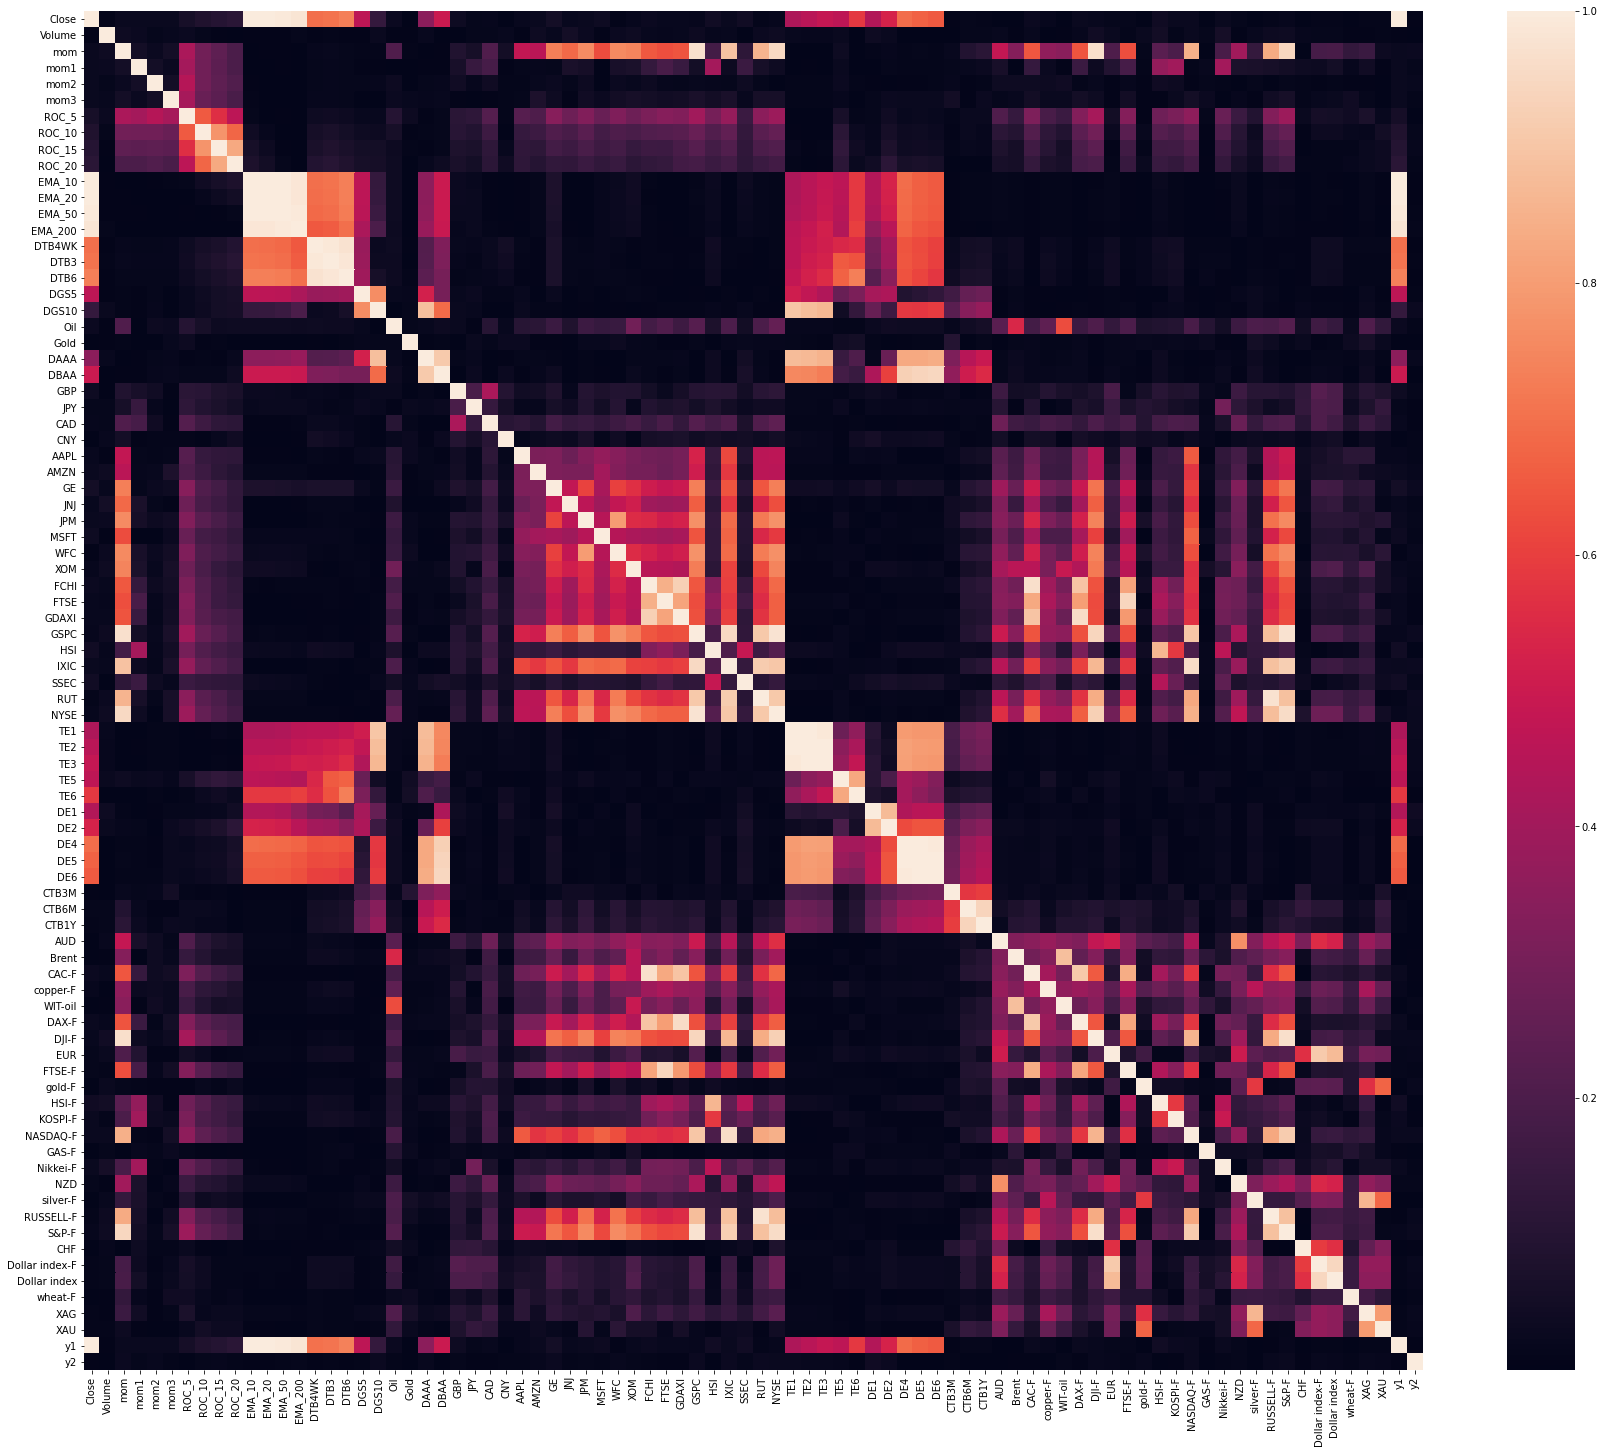

In [115]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_concat.corr().abs(), annot=False)

In [84]:
top_features1 = df_concat.corr().abs().y1.sort_values(ascending=False)[1:20]
top_features2 = df_concat.corr().abs().mom.sort_values(ascending=False)[1:15]

print(top_features1)
print(top_features2)

features1 = list(top_features1.index)
features2 = list(top_features2.index)
type(features1)
features = Union(features1, features2)
print(features)

Close      0.999180
EMA_10     0.997854
EMA_20     0.996394
EMA_50     0.992888
EMA_200    0.981427
DTB6       0.734514
DTB3       0.707559
DTB4WK     0.699671
DE4        0.691037
DE5        0.667865
DE6        0.653518
TE6        0.582744
DE2        0.528985
DBAA       0.498430
TE3        0.483163
TE5        0.466075
DGS5       0.465219
TE2        0.454108
DE1        0.440514
Name: y1, dtype: float64
GSPC         0.972306
DJI-F        0.967329
NYSE         0.952757
S&P-F        0.946875
IXIC         0.891937
RUT          0.857016
NASDAQ-F     0.844036
RUSSELL-F    0.832509
JPM          0.760205
WFC          0.755539
XOM          0.742663
GE           0.731856
JNJ          0.685717
FCHI         0.648814
Name: mom, dtype: float64
['Close', 'DBAA', 'DE1', 'DE2', 'DE4', 'DE5', 'DE6', 'DGS5', 'DJI-F', 'DTB3', 'DTB4WK', 'DTB6', 'EMA_10', 'EMA_20', 'EMA_200', 'EMA_50', 'FCHI', 'GE', 'GSPC', 'IXIC', 'JNJ', 'JPM', 'NASDAQ-F', 'NYSE', 'RUSSELL-F', 'RUT', 'S&P-F', 'TE2', 'TE3', 'TE5', 'TE6', 'WF

In [85]:
X = pd.concat([X1[features], X2[features], X3[features]], axis=1, join="inner")
y = df1.iloc[start_index:,1:3].reset_index(drop = True)

scaler = StandardScaler()
# y1 = scaler.fit_transform(y1)
# y2 = scaler.fit_transform(y2)
print(X, "\n", y1)
# print(X1.columns)

             Close  DBAA   DE1   DE2  ...   TE5   TE6       WFC       XOM
0     10978.620117  5.75  1.05  3.25  ...  0.00  0.03 -0.046116 -0.001685
1     11107.969727  5.74  1.05  3.23  ...  0.01  0.04  0.054707  0.016720
2     11146.570313  5.77  1.06  3.20  ...  0.00  0.04 -0.012867 -0.017501
3     11132.559570  5.77  1.07  3.18  ...  0.00  0.03  0.042770  0.013667
4     11164.049805  5.72  1.03  3.13  ...  0.00  0.05  0.016797  0.004696
...            ...   ...   ...   ...  ...   ...   ...       ...       ...
1777  23563.359375  4.24  0.67  1.92  ...  0.17  0.28 -0.003017  0.006853
1778  23461.939453  4.26  0.66  1.93  ...  0.17  0.28 -0.020114 -0.002030
1779  23422.210938  0.00  0.00 -2.40  ...  0.18  0.29 -0.014351 -0.001316
1780  23439.699219  4.33  0.64  1.93  ...  0.17  0.28 -0.004792  0.005990
1781  23409.470703  4.31  0.65  1.93  ...  0.18  0.31 -0.003519 -0.012266

[1782 rows x 99 columns] 
              Close
0     11107.969727
1     11146.570313
2     11132.559570
3     11

In [86]:
X_test = X[-20:]
X_train = X[:-20]
Y_test = y1[-20:]
Y_train = y1[:-20]
print("Shape of X input is ", X_train.shape)
print("Shape of X test is ", X_test.shape)
print("Shape of Y input is ", Y_train.shape)
print("Shape of Y test is ", Y_test.shape)
print(X_train)
print(Y_train)

Shape of X input is  (1762, 99)
Shape of X test is  (20, 99)
Shape of Y input is  (1762, 1)
Shape of Y test is  (20, 1)
             Close  DBAA   DE1   DE2  ...   TE5   TE6       WFC       XOM
0     10978.620117  5.75  1.05  3.25  ...  0.00  0.03 -0.046116 -0.001685
1     11107.969727  5.74  1.05  3.23  ...  0.01  0.04  0.054707  0.016720
2     11146.570313  5.77  1.06  3.20  ...  0.00  0.04 -0.012867 -0.017501
3     11132.559570  5.77  1.07  3.18  ...  0.00  0.03  0.042770  0.013667
4     11164.049805  5.72  1.03  3.13  ...  0.00  0.05  0.016797  0.004696
...            ...   ...   ...   ...  ...   ...   ...       ...       ...
1757  22872.890625  4.32  0.72  1.97  ...  0.00  0.00 -0.007917  0.003916
1758  22841.009766  4.30  0.72  1.97  ...  0.04  0.22  0.008524  0.002804
1759  22871.720703  4.25  0.71  1.97  ...  0.06  0.21  0.000899  0.004133
1760  22956.960938  4.27  0.71  1.97  ...  0.10  0.27 -0.008085 -0.002058
1761  22997.439453  4.25  0.71  1.95  ...  0.12  0.28 -0.027531 -0

In [87]:
# Y_test= scaler.inverse_transform(Y_test)
Y_test

,Close
1762,23163.039063
1763,23328.630859
1764,23273.960938
1765,23441.759766
1766,23329.460938
1767,23400.859375
1768,23434.189453
1769,23348.740234
1770,23377.240234
1771,23435.009766


In [88]:
#To check for any missing value
X_train = np.nan_to_num(X_train)
print(np.isnan(np.sum(X_train)))

X_test = np.nan_to_num(X_test)
print(np.isnan(np.sum(X_test)))

print(np.isnan(np.sum(Y_train)))

False
False
Close    False
dtype: bool


In [89]:
seed_value = 5
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)


In [90]:
def r_sqrd(y_true, y_pred):
  from keras import backend as K
  SS_res =  K.sum(K.square( y_true-y_pred ))
  SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
  return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Available activation functions:
relu function

*   sigmoid function
  softmax function
  softplus function
  softsign function
  tanh function
  selu function
  elu function
  exponential function

In [209]:
epochs_no = 600
model = Sequential()
model.add(Dense(30, input_dim=99, activation='linear'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError(), 'mae', 'mape', r_sqrd])

history = model.fit(X_train, Y_train, validation_split=0.1, epochs=epochs_no, batch_size=100, verbose = 2)

Epoch 1/600
16/16 - 1s - loss: 40298804.0000 - root_mean_squared_error: 6348.1338 - mae: 5057.5967 - mape: 32.9728 - r_sqrd: -5.8332e+00 - val_loss: 36373748.0000 - val_root_mean_squared_error: 6031.0654 - val_mae: 6027.4634 - val_mape: 28.1905 - val_r_sqrd: -2.8272e+02
Epoch 2/600
16/16 - 0s - loss: 5689829.0000 - root_mean_squared_error: 2385.3362 - mae: 1988.6907 - mape: 13.0003 - r_sqrd: 0.0514 - val_loss: 6400027.5000 - val_root_mean_squared_error: 2529.8276 - val_mae: 2525.0112 - val_mape: 11.8007 - val_r_sqrd: -4.8601e+01
Epoch 3/600
16/16 - 0s - loss: 1196957.8750 - root_mean_squared_error: 1094.0557 - mae: 913.0503 - mape: 5.9831 - r_sqrd: 0.8058 - val_loss: 1565691.8750 - val_root_mean_squared_error: 1251.2761 - val_mae: 1245.1709 - val_mape: 5.8286 - val_r_sqrd: -1.1306e+01
Epoch 4/600
16/16 - 0s - loss: 255233.6406 - root_mean_squared_error: 505.2065 - mae: 421.3075 - mape: 2.7606 - r_sqrd: 0.9582 - val_loss: 176871.9375 - val_root_mean_squared_error: 420.5615 - val_mae: 40

In [210]:
result = Y_test.copy()
result['Predicted'] = model.predict(X_test)
result

,Close,Predicted
1762,23163.039063,23114.216797
1763,23328.630859,23156.902344
1764,23273.960938,23291.074219
1765,23441.759766,23274.492188
1766,23329.460938,23391.529297
1767,23400.859375,23362.164062
1768,23434.189453,23405.119141
1769,23348.740234,23473.478516
1770,23377.240234,23407.835938
1771,23435.009766,23405.767578


In [211]:
test_rmse = metrics.mean_squared_error(result.Close, result.Predicted, squared = False)
print("Test RMSE =",  test_rmse )

test_mae = metrics.mean_absolute_error(result.Close, result.Predicted)
print("Test MAE =",  test_mae )

# test_r2 = metrics.r2_score(result.Close, result.Predicted)
# print("Test R2 score =",  test_r2 )

Test RMSE = 88.16983978627655
Test MAE = 68.41269529999991


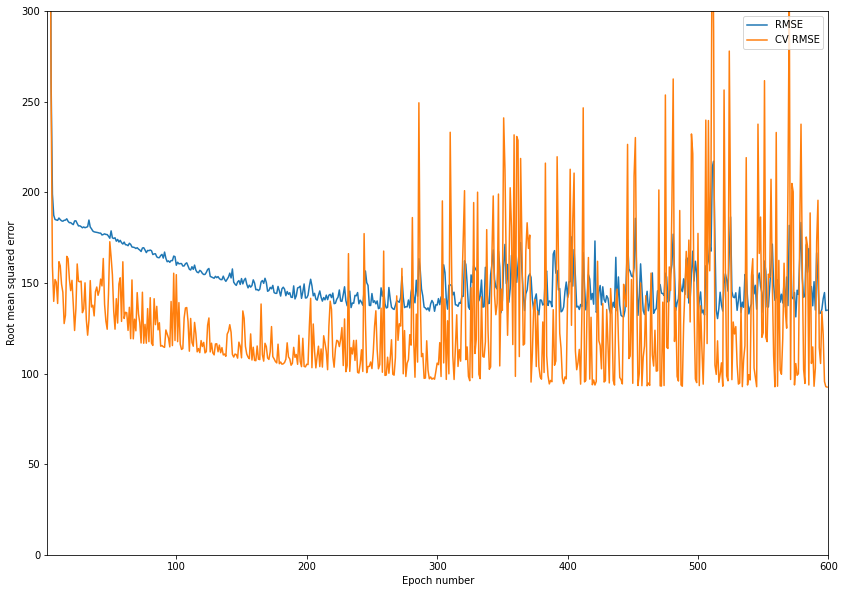

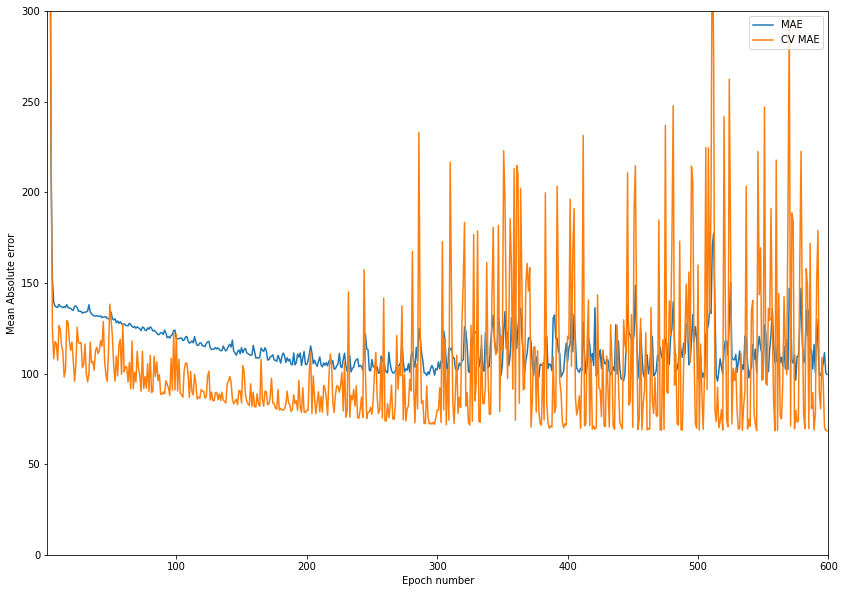

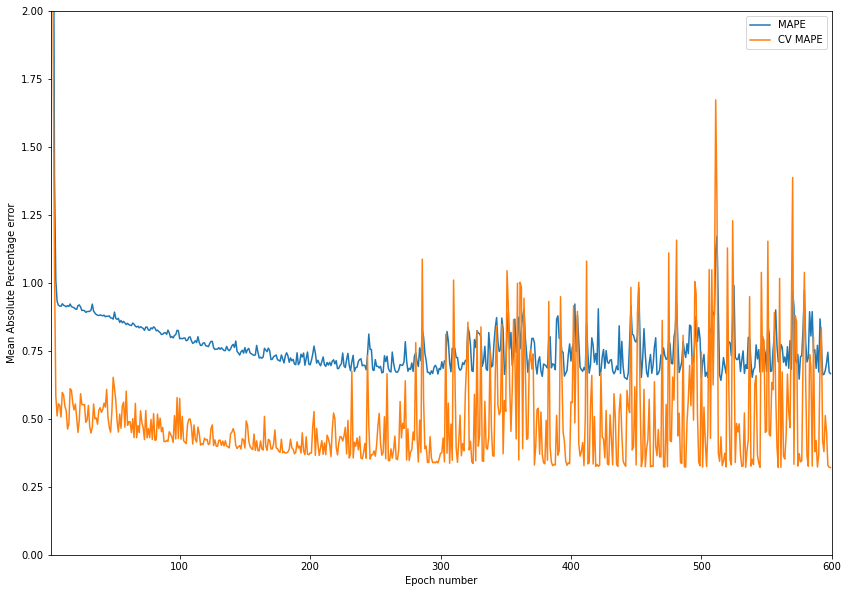

In [212]:
# epochs_no = 300
# plot metrics after removing the first 2 epochs 
plt.figure(figsize=(14, 10))
plt.xlim(1, epochs_no)
plt.ylim(0, 300)
plt.xlabel("Epoch number")
plt.ylabel("Root mean squared error")
plt.plot(history.history['root_mean_squared_error'], label = 'RMSE',)
plt.plot(history.history['val_root_mean_squared_error'], label = 'CV RMSE')
plt.legend(loc="upper right")
plt.show()
plt.figure(figsize=(14, 10))
plt.xlim(1, epochs_no)
plt.ylim(0, 300)
plt.xlabel("Epoch number")
plt.ylabel("Mean Absolute error")
plt.plot(history.history['mae'], label = 'MAE')
plt.plot(history.history['val_mae'], label = 'CV MAE')
plt.legend(loc="upper right")
plt.show()
plt.figure(figsize=(14, 10))
plt.xlim(1, epochs_no)
plt.ylim(0, 2)
plt.xlabel("Epoch number")
plt.ylabel("Mean Absolute Percentage error")
plt.plot(history.history['mape'], label = 'MAPE')
plt.plot(history.history['val_mape'], label = 'CV MAPE')
plt.legend(loc="upper right")
plt.show()
# plt.figure(figsize=(14, 10))
# plt.xlim(1, epochs_no)
# plt.ylim(0, 1)
# plt.plot(history.history['r_sqrd'], label = 'R_squared')
# plt.plot(history.history['val_r_sqrd'], label = 'CV R_squared')
# plt.legend(loc="upper right")
# plt.show()